In [10]:
import os
import time
import torch
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict

from models import VAE

parser = argparse.ArgumentParser()
parser.add_argument("--seed", type=int, default=0)
parser.add_argument("--epochs", type=int, default=10)
parser.add_argument("--batch_size", type=int, default=64)
parser.add_argument("--learning_rate", type=float, default=0.001)
parser.add_argument("--encoder_layer_sizes", type=list, default=[784, 256])
parser.add_argument("--decoder_layer_sizes", type=list, default=[256, 784])
parser.add_argument("--latent_size", type=int, default=2)
parser.add_argument("--print_every", type=int, default=937)
parser.add_argument("--fig_root", type=str, default='figures')
parser.add_argument("--conditional", action='store_false')

args = parser.parse_args()

# Fix: Ensure fig_root is a directory, not a file path
if not os.path.isdir(args.fig_root):
    args.fig_root = 'figures'


In [11]:
dataset = MNIST(
        root='data', train=True, transform=transforms.ToTensor(),
        download=True)
data_loader = DataLoader(
        dataset=dataset, batch_size=args.batch_size, shuffle=True)

In [12]:
#load the trained model
# args.conditional = True  # Set to True for CVAE, False for VAE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = VAE(
    encoder_layer_sizes=args.encoder_layer_sizes,
    latent_size=args.latent_size,
    decoder_layer_sizes=args.decoder_layer_sizes,
    conditional=args.conditional,
    num_labels=10 if args.conditional else 0).to(device)
vae.load_state_dict(torch.load(os.path.join(os.path.join(
            'models', "vae.pth"))))


<All keys matched successfully>

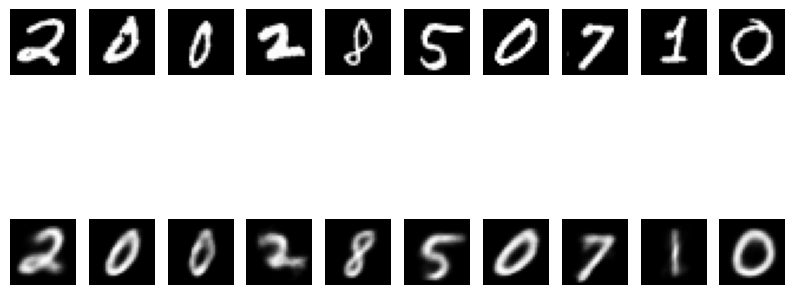

In [13]:
# inference using the trained model and visualize the results
for x, y in data_loader:
    x, y = x.to(device), y.to(device)

    if args.conditional:
        recon_x, mean, log_var, z = vae(x, y)
    else:
        recon_x, mean, log_var, z = vae(x)

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(x[i].view(28, 28).cpu().data.numpy(), cmap='gray')
        plt.axis('off')
        plt.subplot(2, 10, i + 11)
        plt.imshow(recon_x[i].view(28, 28).cpu().data.numpy(), cmap='gray')
        plt.axis('off')
    plt.show()
    break

In [14]:
parser = argparse.ArgumentParser()
parser.add_argument("--seed", type=int, default=0)
parser.add_argument("--epochs", type=int, default=10)
parser.add_argument("--batch_size", type=int, default=64)
parser.add_argument("--learning_rate", type=float, default=0.001)
parser.add_argument("--encoder_layer_sizes", type=list, default=[784, 256])
parser.add_argument("--decoder_layer_sizes", type=list, default=[256, 784])
parser.add_argument("--latent_size", type=int, default=2)
parser.add_argument("--print_every", type=int, default=937)
parser.add_argument("--fig_root", type=str, default='figures')
parser.add_argument("--conditional", action='store_true')

args = parser.parse_args()

# Fix: Ensure fig_root is a directory, not a file path
if not os.path.isdir(args.fig_root):
    args.fig_root = 'figures'

In [15]:
#load the trained model
# args.conditional = True  # Set to True for CVAE, False for VAE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = VAE(
    encoder_layer_sizes=args.encoder_layer_sizes,
    latent_size=args.latent_size,
    decoder_layer_sizes=args.decoder_layer_sizes,
    conditional=args.conditional,
    num_labels=10 if args.conditional else 0).to(device)
vae.load_state_dict(torch.load(os.path.join(os.path.join(
            'models', "cvae.pth"))))


<All keys matched successfully>

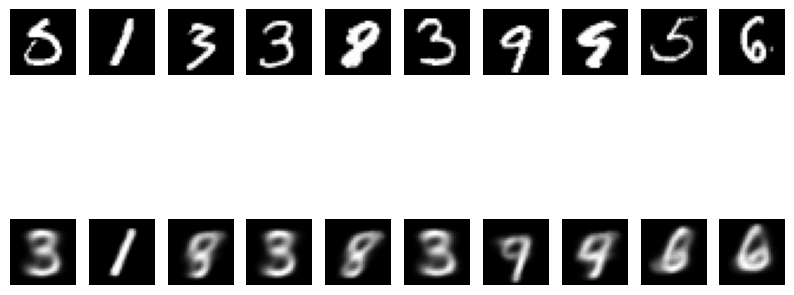

In [16]:
# inference using the trained model and visualize the results
for x, y in data_loader:
    x, y = x.to(device), y.to(device)

    if args.conditional:
        recon_x, mean, log_var, z = vae(x, y)
    else:
        recon_x, mean, log_var, z = vae(x)

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(x[i].view(28, 28).cpu().data.numpy(), cmap='gray')
        plt.axis('off')
        plt.subplot(2, 10, i + 11)
        plt.imshow(recon_x[i].view(28, 28).cpu().data.numpy(), cmap='gray')
        plt.axis('off')
    plt.show()
    break